# <span style="color:darkred"> Laboratorio di Simulazione Numerica </span>
## <span style="color:darkorange">  Esercitazione 6</span>

## 06.1

In questo esercizo ho simulato un modello di Ising monodimensionale. L'Hamiltoniana di tale sistema, considerando l'interazione fra gli spin vicini si può scrivere nel modo seguente:

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1})\ ,
$$

in cui $\{ s_i \}_{i=1,N}$ è l'insieme degli spin, i quali possono valere $\pm1$, $J>0$ (materiale ferromagnetico) descrive l'interazione fra i primi vicini, $h$ è il campo magnetico esterno e si assume la condizione al contorno $s_{N+1} = s_{1}$. Si considera anche $\mu_B=1$ e $k_B=1$. La funzione di partizione per $N$ spin viene calcolata in modo esatto:

$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N\ ,
$$

con $\lambda_{1,2} = e^{\beta J} \cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)\right]^{1/2}$, con $\beta=\frac{1}{k_B T} = \frac{1}{T}\ $. Conosciuta questa funzione si possono ottenere le seguenti grandezze termodinamiche:
- Energia Interna per spin $U/N$ con $h=0$:$\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N} =-J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl) ,$
- Capacità Termica $C$ con $h=0$:
$\frac{C(N,T)}{N} = \frac{1}{N} k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right)=
k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\} , $
- Magnetizzazione $M$ con $h\not=0$:
$M(N,T,h) =\left\langle \sum_{i=1,N}s_i \right\rangle=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr] , $
- Suscettività magnetica $\chi$ con $h=0$:
$\chi(N,T) = \beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle - \left\langle \sum_{i=1,N}s_i \right\rangle^2 \right] = \beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right] = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl) . $

Attraverso l'algoritmo fornitomi ho potuto campionare queste grandezze termodinamiche, calcolando i valori medi della prima definizione e confrontando poi i risultati con quelli analitici. Per poter campionare le diverse configurazioni ho implementato il metodo di Metropolis e di Gibbs. Tramite Metropolis si sceglie casualmente uno spin su tutti quelli del sistema e si propone di cambiarlo di segno. Si valuta l'energia prima e dopo il cambiamento e la si accetta con una probabilità $A = min(1, e^{-\beta(energy_{new}-energy_{old})})$. Il campionamento alla Gibbs invece, una volta selezionato il singolo spin, valuta l'energia del sistema in cui lo spin ha segno positivo (che chiamo *energy up*) e viceversa (che chiamo *energy down*). Si porrà lo spin pari a $1$ con una probabilità $A = min(1, \frac{1}{1+e^{-\beta(energy_{down}-energy_{up})}})$, altrimenti lo si pone pari a $-1$. Nel metodo alla Gibbs quindi ogni mossa viene accettata.

Ho aggiunto al codice il calcolo delle grandezze termodinamiche. In particolare nella funzione *Measure* ho fatto salvare su un accumulatore relativo alla capacità termica il quadrato dell'energia interna, su quello relativo alla magnentizzazione ho fatto salvare la somma degli spin e su quello della suscettività magnetica il quandrato della somma degli spin. Questi non costituiscono le vere grandezze da misurare, ma il calcolo viene effettuato nella funzione *Averages* in cui si utilizzano questi accumulatori insieme per calcolare le differenti quantità.

Per dare la possibilità di scegliere fra uno dei due metodi di campionamento ho fatto leggere in *input* la variabile *metro*: quando è uguale a $1$ allora si utilizza il metodo di Metropolis, altrimenti si utilizza il metodo di Gibbs.
Ho inoltre aggiunto un indice *restart* al file di *input*. Se posto uguale a $0$, il codice parte da una configurazione di spin casuale che corrisponde alla situazione di temperatura infinita, mentre se posto pari a $1$ parte dalla configurazione finale della simulazione precedente. Questo passaggio è stato molto utile nella fase di equilibrazione.

### Equilibrazione e misure

È stata necessaria una prima fase di equilibrazione per la misura delle grandezze termodinamiche per ogni temperatura considerata. Ho fatto andare la simulazione alla temperatura $T=2$ con indice *restart=0* considerando $200$ blocchi da $100$ passi ciascuno. Riporto i grafici delle grandezze misurate. Ho osservato che dopo un centinaio di blocchi l'andamento va a diventare stabile e posso considerare il sistema equilibrato. Così, per prendere le misure nel sistema equilibrato ho eseguito in un primo momento una simulazione a vuoto con *restart=0* con $100$ blocchi e $1000$ step per blocco e poi ne ho eseguita un'altra in cui ponendo *restart=1* il codice parte dalla configurazione finale precedente e ho qui misurato le grandezze termodinamiche, utilizzando lo stesso numero di blocchi e di step. Ho effettuato questo procedimento per tutte le temperature, sia con un campionamento alla Gibbs sia con il Metropolis.

Osservando i grafici in cui riporto le grandezze misurate e i risultati analitici, ho trovato un perfetto accordo fra i valori.

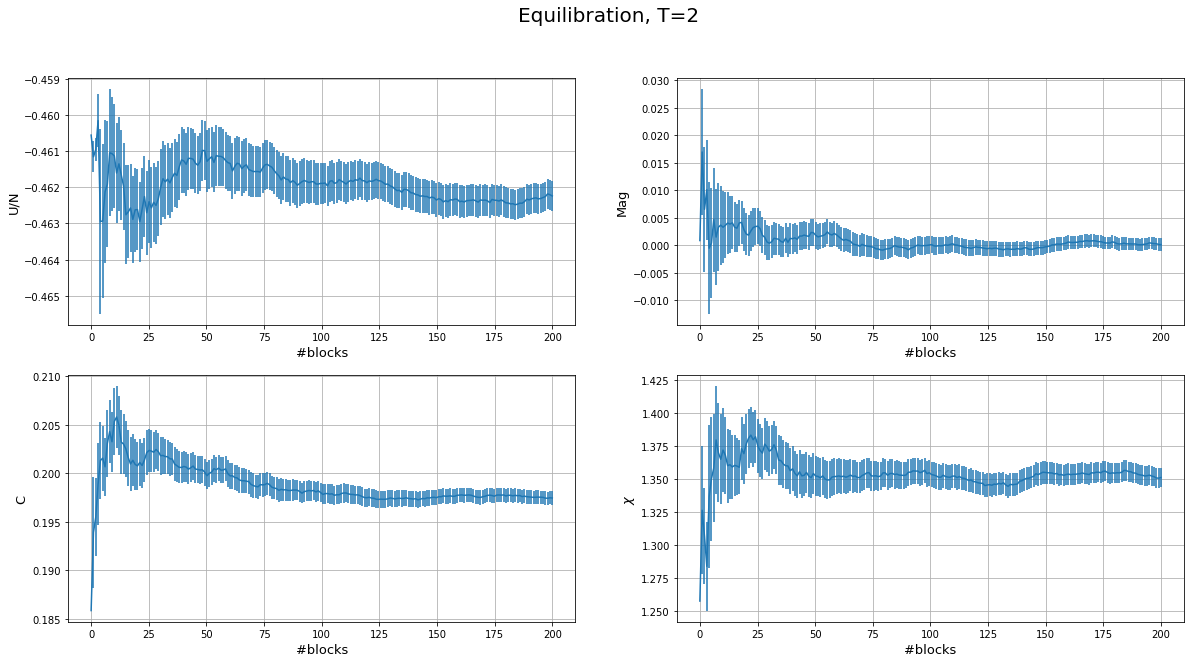

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

(Ene, errEne) = np.loadtxt('ISING_1D/equilibration.ene.0', usecols=(2,3), unpack=True)
(Heat, errHeat) = np.loadtxt('ISING_1D/equilibration.heat.0', usecols=(2,3), unpack=True)
(Mag, errMag) = np.loadtxt('ISING_1D/equilibration.mag.0', usecols=(2,3), unpack=True)
(Chi, errChi) = np.loadtxt('ISING_1D/equilibration.chi.0', usecols=(2,3), unpack=True)

x=np.linspace(0, len(Ene), len(Ene))

fig, axs = plt.subplots(2, 2, figsize=(20,10))
plt.suptitle('Equilibration, T=2', fontsize=20)
axs[0,0].errorbar(x, Ene, yerr=errEne)
axs[0,0].set_ylabel('U/N', fontsize=13)

axs[1,0].errorbar(x, Heat, yerr=errHeat)
axs[1,0].set_ylabel('C', fontsize=13)

axs[0,1].errorbar(x, Mag, yerr=errMag)
axs[0,1].set_ylabel('Mag', fontsize=13)

axs[1,1].errorbar(x, Chi, yerr=errChi)
axs[1,1].set_ylabel('$\chi$', fontsize=13)

for ax in axs.flat:
    ax.set_xlabel('#blocks', fontsize=13)
    ax.grid()

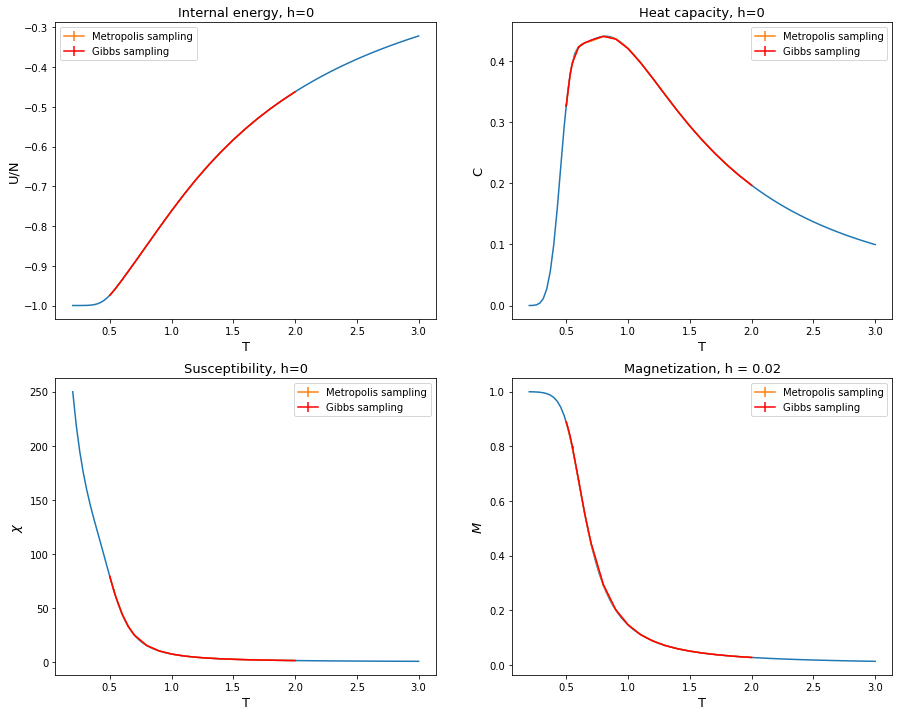

In [4]:
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

(temp, U_M, errU_M) = np.loadtxt('ISING_1D/final_metro_h0.dat', usecols=(0, 1, 2), unpack=True)
(U_G, errU_G) = np.loadtxt('ISING_1D/final_gibbs_h0.dat', usecols=(1, 2), unpack=True)

fig, axs = plt.subplots(2, 2, figsize=(15,12))

axs[0,0].plot(T, e)
axs[0,0].errorbar(temp, U_M, yerr=errU_M, label = 'Metropolis sampling')
axs[0,0].errorbar(temp, U_G, yerr=errU_G, label = 'Gibbs sampling', color='red')
axs[0,0].set_title('Internal energy, h=0', fontsize=13)
axs[0,0].set_ylabel('U/N', fontsize=13)

heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
(C_M, errC_M) = np.loadtxt('ISING_1D/final_metro_h0.dat', usecols=(3,4), unpack=True)
(C_G, errC_G) = np.loadtxt('ISING_1D/final_gibbs_h0.dat', usecols=(3,4), unpack=True)

axs[0,1].plot(T, heat)
axs[0,1].errorbar(temp, C_M, yerr=errC_M, label = 'Metropolis sampling')
axs[0,1].errorbar(temp, C_G, yerr=errC_G, label = 'Gibbs sampling', color='red')
axs[0,1].set_title('Heat capacity, h=0', fontsize=13)
axs[0,1].set_ylabel('C', fontsize=13)

X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
(Chi_M, errChi_M) = np.loadtxt('ISING_1D/final_metro_h0.dat', usecols=(7,8), unpack=True)
(Chi_G, errChi_G) = np.loadtxt('ISING_1D/final_gibbs_h0.dat', usecols=(7,8), unpack=True)

axs[1,0].plot(T, X)
axs[1,0].errorbar(temp, Chi_M, yerr=errChi_M, label = 'Metropolis sampling')
axs[1,0].errorbar(temp, Chi_G, yerr=errChi_G, label = 'Gibbs sampling', color='red')
axs[1,0].set_title('Susceptibility, h=0', fontsize=13)
axs[1,0].set_ylabel('$\chi$', fontsize=13)

h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

(tempM, Mag_M, errMag_M) = np.loadtxt('ISING_1D/final_metro_h002.dat', usecols=(0, 5,6), unpack=True)
(Mag_G, errMag_G) = np.loadtxt('ISING_1D/final_gibbs_h002.dat', usecols=(5,6), unpack=True)

axs[1,1].plot(T, M)
axs[1,1].errorbar(tempM, Mag_M, yerr=errMag_M, label = 'Metropolis sampling')
axs[1,1].errorbar(tempM, Mag_G, yerr=errMag_G, label = 'Gibbs sampling', color='red')
axs[1,1].set_title('Magnetization, h = 0.02', fontsize=13)
axs[1,1].set_ylabel('$M$', fontsize=13)

for ax in axs.flat:
    ax.set_xlabel('T', fontsize=13)
    ax.legend(fontsize='medium')